In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hrz_loc = pd.read_csv('./data/horizons/florian/Top_Tuxen_Valdemar_TWT',names = ['cdp_x', 'cdp_y','twt'], sep='\s+')

In [3]:
hrz = pd.read_csv('./data/horizons/florian/LOCRETA surfaces meters/TopTuxen_Florian (Depth 1)',names = ['cdp_x', 'cdp_y','twt','IL','XL'], sep='\s+', skiprows=20)

In [4]:
hrz

,cdp_x,cdp_y,twt,IL,XL
0,613447.957,6.156589e+06,2940.082031,310,2
1,613547.957,6.156589e+06,2943.007080,311,2
2,613647.957,6.156589e+06,2943.534912,312,2
3,613747.957,6.156589e+06,2954.055176,313,2
4,613847.957,6.156589e+06,2964.880859,314,2
...,...,...,...,...,...
227550,583747.957,6.207089e+06,3174.024658,13,507
227551,583847.957,6.207089e+06,3175.435791,14,507
227552,583947.957,6.207089e+06,3176.107666,15,507
227553,584047.957,6.207089e+06,3177.644043,16,507


In [5]:
hrz = hrz.loc[(hrz['cdp_x'] < hrz_loc['cdp_x'].max() ) & (hrz['cdp_y'] < hrz_loc['cdp_y'].max()) ]

In [6]:
hrz

,cdp_x,cdp_y,twt,IL,XL
272,591447.957,6.156689e+06,3674.925049,90,3
273,591547.957,6.156689e+06,3679.449951,91,3
274,591647.957,6.156689e+06,3667.376709,92,3
275,591747.957,6.156689e+06,3659.260986,93,3
276,591847.957,6.156689e+06,3655.450439,94,3
...,...,...,...,...,...
202332,607347.957,6.194789e+06,2861.433350,249,384
202333,607447.957,6.194789e+06,2868.156494,250,384
202334,607547.957,6.194789e+06,2876.436279,251,384
202335,607647.957,6.194789e+06,2874.458984,252,384


In [7]:
wells = pd.read_excel('./data/DK_wells_locations.xlsx', names = ['Well', 'Seq.No', 'Field', 'Structure', 'Sector', 'Platform', 'UTM x', 'UTM y', 'UTM Zone', 'Datum'])

In [8]:
wells.drop(index = wells.loc[wells['Sector'] == 'GREENLAND'].index, inplace=True)
wells.drop(columns = 'Datum', inplace=True)

In [9]:
wells.dropna(axis=0, inplace=True)

In [10]:
wells

,Well,Seq.No,Field,Structure,Sector,Platform,UTM x,UTM y,UTM Zone
99,VBA-5,0.0,Valdemar,BO,DANISH,VALDEMAR BA,598138.63,6185593.79,31.0
160,VBA-4,0.0,Valdemar,UNKNOWN,DANISH,VALDEMAR BA,598138.62,6185594.72,31.0
200,RAU-1,0.0,UNKNOWN,UNKNOWN,DANISH,UNKNOWN,601730.93,6247531.93,31.0
264,BRODER TUCK-1,0.0,Broder Tuck,UNKNOWN,DANISH,UNKNOWN,615420.05,6149922.87,31.0
324,SKELBRO-2,0.0,UNKNOWN,UNKNOWN,DANISH,UNKNOWN,492534.00,6099356.00,33.0
...,...,...,...,...,...,...,...,...,...
4759,ØSTER HALNE-5,25610.0,UNKNOWN,UNKNOWN,DANISH,UNKNOWN,547188.81,6330265.50,32.0
4760,ØSTER HALNE-6,25620.0,UNKNOWN,UNKNOWN,DANISH,UNKNOWN,544082.38,6326186.00,32.0
4762,ØSTER VRÅ-1,25630.0,UNKNOWN,UNKNOWN,DANISH,UNKNOWN,579603.13,6355093.00,32.0
4764,ÅBENRÅ-1,25640.0,UNKNOWN,ÅBENRÅ,DANISH,UNKNOWN,522677.69,6097826.00,32.0


In [11]:
from scipy.interpolate import griddata
xi = np.linspace(hrz.cdp_x.min(), hrz.cdp_x.max(), 2500)
yi = np.linspace(hrz.cdp_y.min(), hrz.cdp_y.max(), 2500)
X, Y = np.meshgrid(xi, yi)
Z = griddata((hrz.cdp_x, hrz.cdp_y), hrz.twt, (X, Y))


In [12]:
wells.reset_index(drop=True, inplace = True)

In [13]:
import matplotlib
plt.style.use('default')
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['legend.fontsize'] = 'small'
matplotlib.rcParams['axes.labelsize'] = 'medium'
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

In [14]:
import shapefile

In [15]:
#UTM 32 N (ED 50)
fields_poly = shapefile.Reader('./data/Fields_ED50_UTM31n_SL.shp')
geomet = fields_poly.shapeRecords()

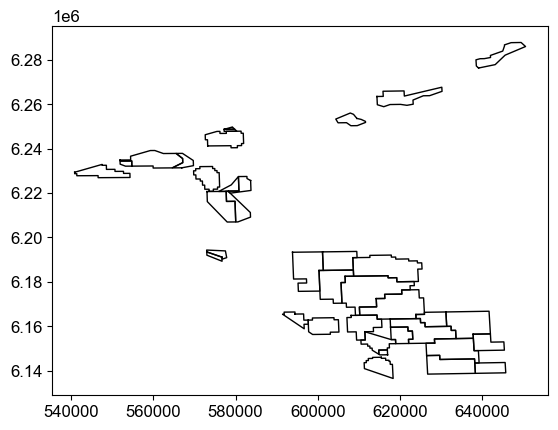

In [16]:
plt.figure()
for p in range(len(geomet)):
        plt.plot(np.array(geomet[p].shape.points)[:,0], np.array(geomet[p].shape.points)[:,1], lw = 1 ,color='k')

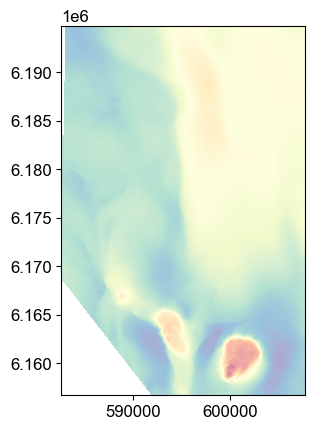

In [19]:
plt.imshow(Z, aspect='equal', extent = [hrz.cdp_x.min(), hrz.cdp_x.max() , hrz.cdp_y.min(), hrz.cdp_y.max()], cmap='Spectral', interpolation='spline36', alpha=.5, origin ='lower')


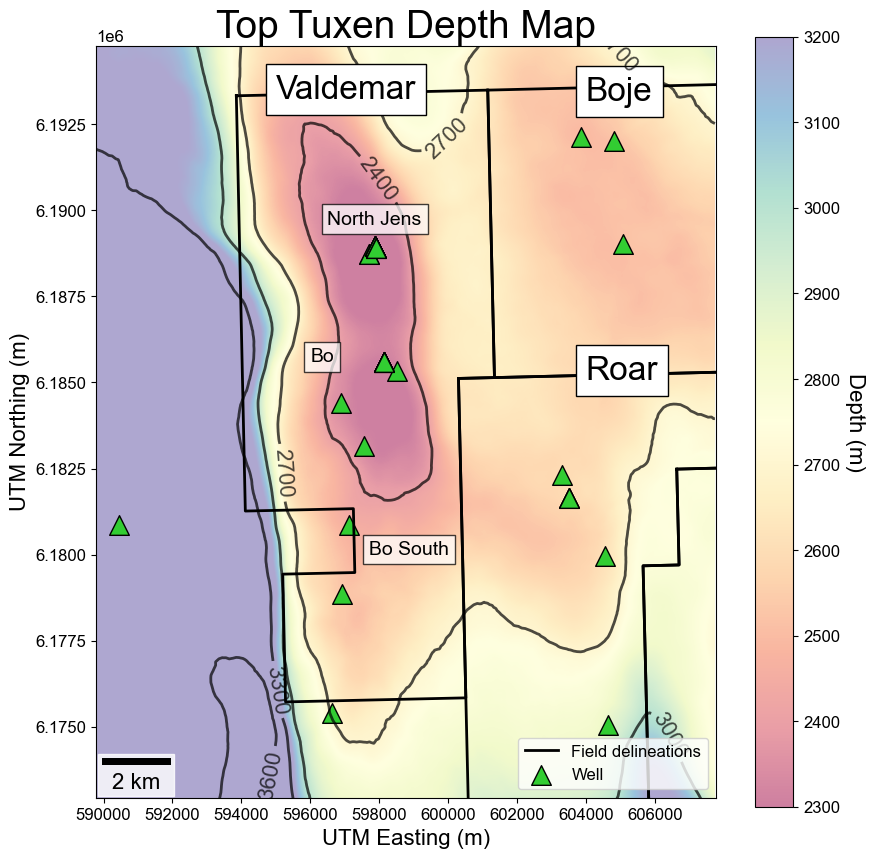

In [28]:
from matplotlib_scalebar.scalebar import ScaleBar
#plt.figure()
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(Z, aspect='equal', extent = [hrz.cdp_x.min(), hrz.cdp_x.max() , hrz.cdp_y.min(), hrz.cdp_y.max()], cmap='Spectral', interpolation='spline36', alpha=.5, origin ='lower')

plt.xlim(hrz_loc.cdp_x.min(), hrz_loc.cdp_x.max())
plt.ylim(hrz_loc.cdp_y.min(), hrz_loc.cdp_y.max()-100)

cbar = plt.colorbar()
cbar.set_label(label='Depth (m)', rotation = -90, labelpad = 18)
plt.clim(2300, 3200) 

cs = plt.contour(Z,levels=10 , extent=[hrz.cdp_x.min(), hrz.cdp_x.max() , hrz.cdp_y.min(), hrz.cdp_y.max()], colors='black', linewidths=2, alpha=0.7)
plt.clabel(cs, inline=True, fmt='%1.0f')




plt.scatter(wells['UTM x'] , wells['UTM y'], marker='^',edgecolor='k', s=200, color='limegreen', label='Well')


props = dict(boxstyle='square', facecolor='white', alpha=1, )
#for i, txt in enumerate(wells['Well']):
#    plt.annotate(txt, (wells['UTM x'][i]-1500, wells['UTM y'][i]+530), bbox=props,fontsize =8)

plt.annotate('Valdemar', (595000, 6193250), bbox = props, fontsize = 24)
plt.annotate('Boje', (604000, 6193200), bbox = props, fontsize = 24)
plt.annotate('Roar', (604000, 6185100), bbox = props, fontsize = 24)


plt.annotate('North Jens', (596500, 6189600), bbox = dict(boxstyle='square', facecolor='white', alpha=.75, ), fontsize = 14)

plt.annotate('Bo', (596000, 6185600), bbox = dict(boxstyle='square', facecolor='white', alpha=.75, ), fontsize = 14)

plt.annotate('Bo South', (597700, 6180000), bbox = dict(boxstyle='square', facecolor='white', alpha=.75, ), fontsize = 14)


scalebar = ScaleBar(1, "m", length_fraction=0.25, box_alpha=0.8,location=3)
ax.add_artist(scalebar)
    
plt.xlabel('UTM Easting (m)')
plt.ylabel('UTM Northing (m)')
#plt.legend(loc=4, fontsize=16)
plt.title('Top Tuxen Depth Map', fontsize=28);


for p in range(len(geomet)):
    if p == 36:
        plt.plot(np.array(geomet[p].shape.points)[:,0], np.array(geomet[p].shape.points)[:,1], lw = 2 ,color='k',label = 'Field delineations')
    else:
        plt.plot(np.array(geomet[p].shape.points)[:,0], np.array(geomet[p].shape.points)[:,1], lw = 2 ,color='k')
plt.legend(loc=4, fontsize=12)        
        
#fig_path = 'M:/LOCRETA_WORKPACKAGE_D/Valdemar_sprint_well_data_Mads_L/MLO documents/Figures/'
#plt.savefig(fig_path+'Tuxen_surveymap.png',format='png', bbox_inches='tight', dpi=150)#

,X,Y,TWT
0,589787.0,6172945.0,2963.923584
1,589812.0,6172945.0,2962.643799
2,589837.0,6172945.0,2961.375732
3,589862.0,6172945.0,2960.119385
4,589887.0,6172945.0,2958.882568
...,...,...,...
633033,607687.0,6194870.0,2554.304443
633034,607712.0,6194870.0,2555.608887
633035,607737.0,6194870.0,2556.912598
633036,607762.0,6194870.0,2558.202637
